<a href="https://colab.research.google.com/github/gopi447/task-2/blob/main/flight_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()


Saving flights_dataset.csv to flights_dataset.csv


In [3]:
df = pd.read_csv('flights_dataset.csv')
df.head()


,Flight_ID,Airline,Origin,Destination,Scheduled_Departure,Actual_Departure,Distance,Delayed
0,F0001,AirIndia,BLR,HYD,2023-05-29 04:10:00,2023-05-29 04:20:00,428,0
1,F0002,Vistara,BOM,BLR,2023-05-05 18:15:00,2023-05-05 18:25:00,631,0
2,F0003,AirIndia,HYD,BLR,2023-05-21 06:37:00,2023-05-21 06:42:00,1521,0
3,F0004,SpiceJet,CCU,HYD,2023-05-04 08:02:00,2023-05-04 08:07:00,677,0
4,F0005,Vistara,DEL,BLR,2023-05-01 22:57:00,2023-05-01 23:27:00,1582,1


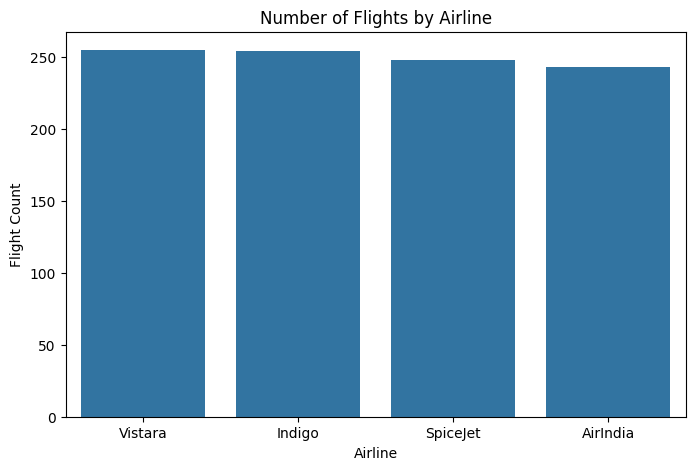

In [4]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Airline', order=df['Airline'].value_counts().index)
plt.title('Number of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Flight Count')
plt.show()


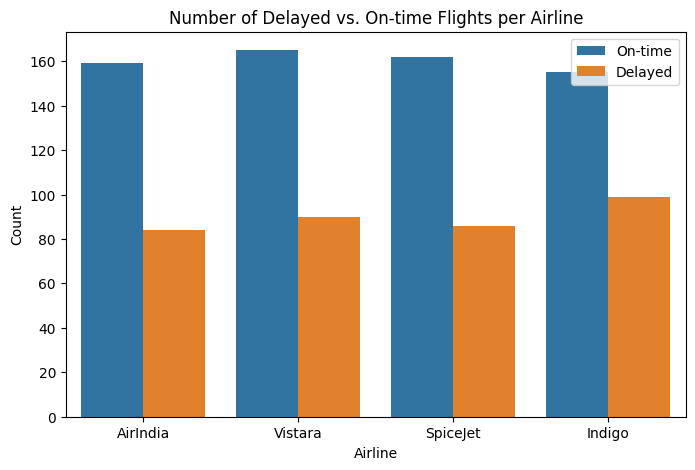

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Airline', hue='Delayed')
plt.title('Number of Delayed vs. On-time Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(['On-time','Delayed'])
plt.show()


/tmp/ipython-input-479209975.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Airline', y='Distance', estimator='mean', ci=None)


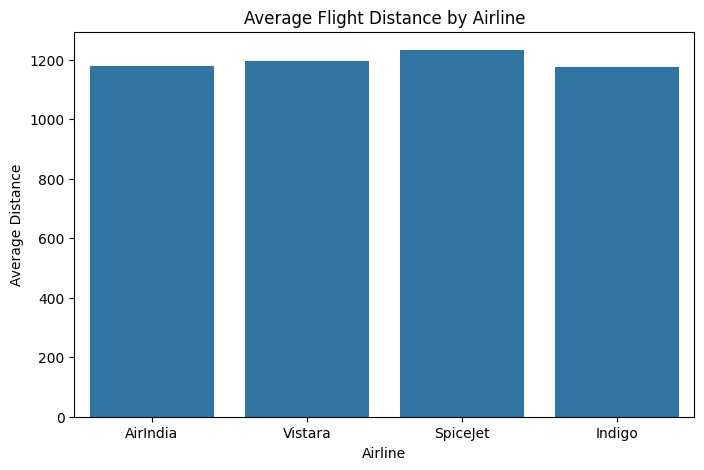

In [6]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Airline', y='Distance', estimator='mean', ci=None)
plt.title('Average Flight Distance by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Distance')
plt.show()


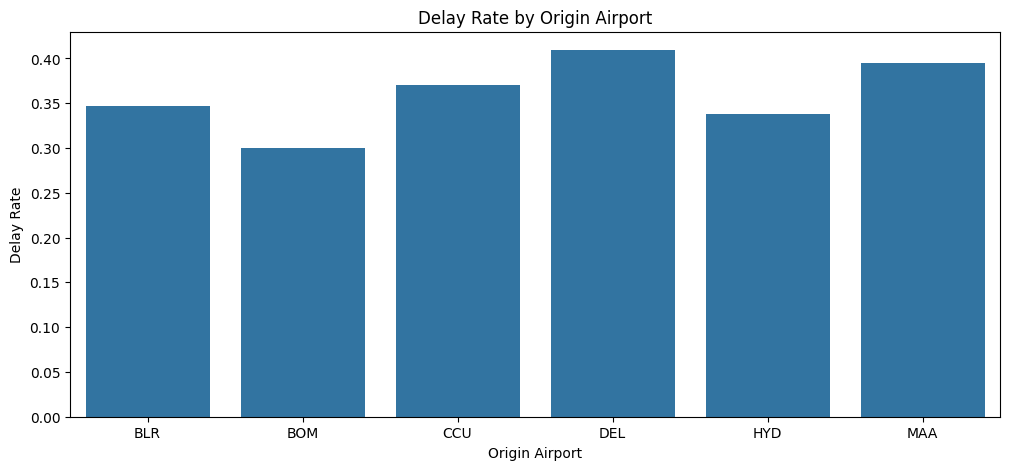

In [7]:
delay_rate = df.groupby('Origin')['Delayed'].mean().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data=delay_rate, x='Origin', y='Delayed')
plt.title('Delay Rate by Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Delay Rate')
plt.show()


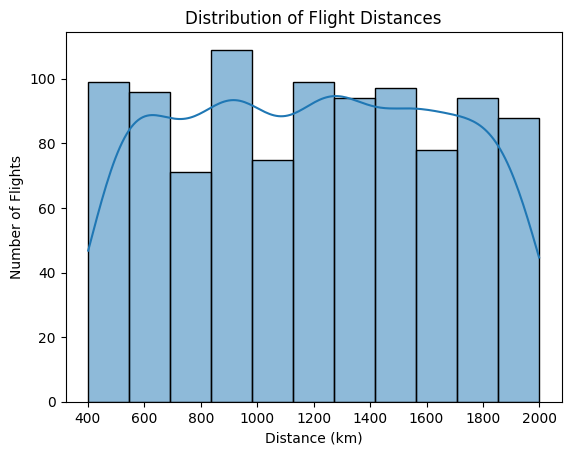

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df, x='Distance', kde=True)
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Flights')
plt.show()


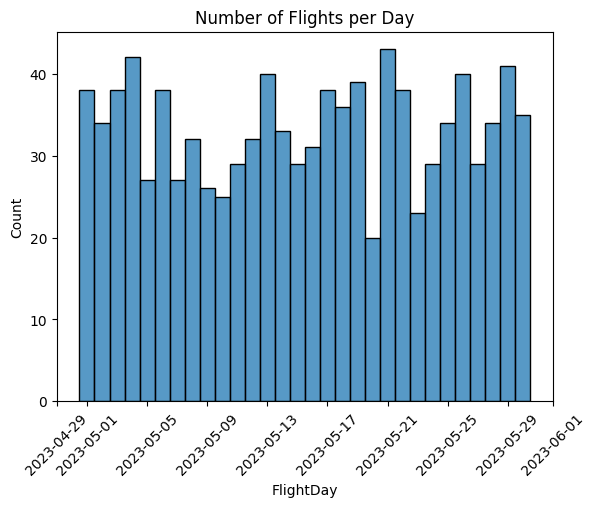

In [9]:
import pandas as pd

df['Scheduled_Departure'] = pd.to_datetime(df['Scheduled_Departure'])
df['Actual_Departure'] = pd.to_datetime(df['Actual_Departure'])

# Example: Flights per day
df['FlightDay'] = df['Scheduled_Departure'].dt.date
sns.histplot(df['FlightDay'], bins=30)
plt.title('Number of Flights per Day')
plt.xticks(rotation=45)
plt.show()


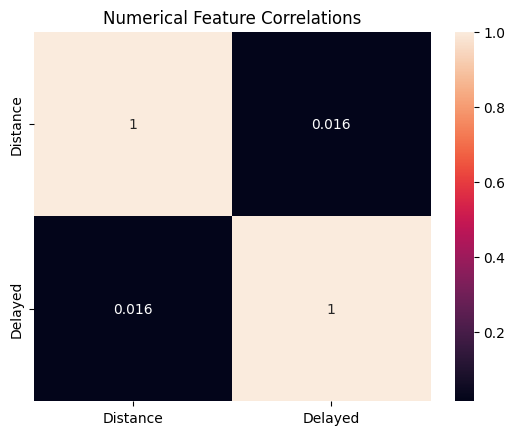

In [10]:
import seaborn as sns

# Select only numeric columns
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True)
plt.title('Numerical Feature Correlations')
plt.show()
